<a href="https://colab.research.google.com/github/lcipolina/ML_Fundamentals/blob/main/Exersise_2a_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercixe 2a - Task 1

Generate multivariate normal (MVN) simulated data with 4 features and 2 classes. Use the posted code ExampleMVN.py. 

The parameter set consists of the mean, the covariance matrix and the number of samples in the two classes.

 Generate samples for three different parameter sets.

### Program to generate a Multivariate Normal Distribution

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def mvn(mean = 0, stdev = 1, corr = 0, n1 = 100, n2 = 200):
  '''
  Generate data from MVN; two classes, three features
  Specify the mean vector and the covariance matrix, for each class
  '''

  #******* Class I Parameters ***********
  muC1 = [0, 2, 3];

  # Correlation matrix, must be symmetric
  corC1 = [(1.0, 0.1, 0.2),
          (0.1, 1.0, 0.0),
          (0.2, 0.0, 1.0)];


  #***********************************
  # Compute covariance matrix

  # These are the sigmas (standard deviation) for each feature.
  DG = np.diag([1, 1.6, 2.2])

  temp = np.matmul(DG, corC1)  
  covC1 = np.matmul(temp, DG)


  #covC1 = [(1.2, 0.1, 0.2),
  #         (0.1, 3.0, 0.0),
  #         (0.2, 0.0, 5.0)];

  #******* Class II Parameters ***********
  muC2 = [0, -2, -3];

  corC2 = [(1.0, -0.1, 0.1),
          (-0.1, 1.0, 0.0),
          (0.1, 0.0, 1.0)];



  #***********************************
  # Compute covariance matrix, must be symmetric

  # These are the sigmas (standard deviation) for each feature.
  DG = np.diag([3.0, 3.0, 3.0])

  temp = np.matmul(DG, corC1)
  covC2 = np.matmul(temp, DG)


  #***********************************
  # Specify sample size for each class
  NSamples1 = 100
  NSamples2 = 100
          
  #***********************************
  # Create columns, with class labels
  Class1 = np.ones((NSamples1,1))
  Class2 = np.full((NSamples2,1), 2)

  #***********************************
  # Generate samples, and put it in a dataframe
  data1 = np.random.multivariate_normal(muC1, covC1, NSamples1)
  Cdata1 = np.c_[data1, Class1]

  df1 = pd.DataFrame(Cdata1, columns=["X1", "X2", "X3", "labels"])

  data2 = np.random.multivariate_normal(muC2, covC2, NSamples2)
  Cdata2 = np.c_[data2, Class2]

  df2 = pd.DataFrame(Cdata2, columns=["X1", "X2", "X3", "labels"])


  #***********************************
  # Concatenate the two sets of samples
  dfM = df1.append(df2, ignore_index=True)

  return dfM

 


<Figure size 432x288 with 0 Axes>

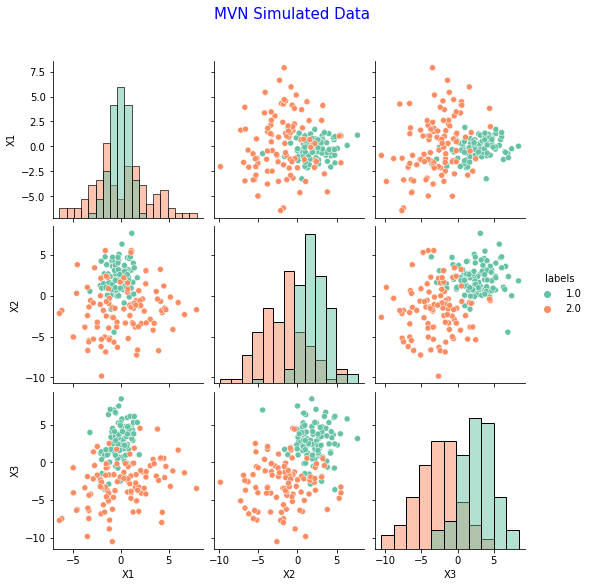

In [3]:
dfM =  mvn()

# Pairplot
plt.figure(0)
f0 = sns.pairplot(dfM, hue="labels", palette="Set2", diag_kind="hist")
f0.fig.suptitle("MVN Simulated Data", y=1.08, color="#0000ff", fontsize=15)
plt.show()

Shape of the data:  (200, 4)


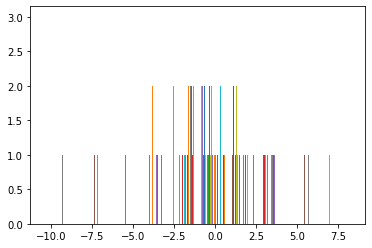

Accuracy score:  0.9666666666666667
Recall score:  0.9666666666666667
Precision score:  0.9666666666666667
F1 score:  0.9666666666666667
Confusion Matrix: 
 [[26  1]
 [ 1 32]]


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

print('Shape of the data: ',dfM.shape)
dfM.head()



# plotting histogram
plt.hist(dfM.iloc[:,:-1])
plt.show()



#  Split the data into train-test set in 70-30 ratio. 
X_train, X_test, y_train, y_test = train_test_split(dfM.iloc[:,:-1].values, dfM.iloc[:,-1:].values, test_size=0.3)

# 3. Implement classification using Naive Bayes’ classifier
clf = GaussianNB().fit(X_train,y_train)
y_pred = clf.predict(X_test)

print('Accuracy score: ',accuracy_score(y_test, y_pred))
print('Recall score: ',recall_score(y_test, y_pred,average='micro'))
print('Precision score: ',precision_score(y_test, y_pred,average='micro'))
print('F1 score: ',f1_score(y_test, y_pred,average='micro'))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))